In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math as m



In [2]:
df_test = pd.read_csv('5297Q_2010-11.txt',
                      usecols =["DATUM","MESSWERT_NUM"] ,
                      index_col=0, 
                      parse_dates=True, 
                      infer_datetime_format=True,
                      dayfirst=True,
                      decimal='.',
                      sep=",")

In [3]:
df_test

,MESSWERT_NUM
DATUM,
2010-01-01,448.59
2010-01-02,448.60
2010-01-03,448.60
2010-01-04,448.60
2010-01-05,448.60
2010-01-06,448.59
2010-01-07,448.59
2010-01-08,448.59
2010-01-09,448.58


In [22]:
X = np.array(df_test.index.values - df_test.index.values.min() , dtype=(float)) / (1e9 * 60 * 60 * 24)

df_test = df_test.assign(X =X[:])
df_test["Y"] = 0. 
P = np.array( df_test.dropna().reset_index()[['DATUM','Y','MESSWERT_NUM']] )

In [23]:
df_test

,MESSWERT_NUM,X,Y
DATUM,,,
2010-01-01,448.59,0.0,0.0
2010-01-02,448.60,1.0,0.0
2010-01-03,448.60,2.0,0.0
2010-01-04,448.60,3.0,0.0
2010-01-05,448.60,4.0,0.0
2010-01-06,448.59,5.0,0.0
2010-01-07,448.59,6.0,0.0
2010-01-08,448.59,7.0,0.0
2010-01-09,448.58,8.0,0.0


In [39]:
def test_data(data,             
              noise_type ="gaussian",
              noise_mean = 0,
              noise_std = 1,
              n_sample = None):
    
    df_z = pd.DataFrame(data)
         

    
    if n_sample is not None:
        df_z = df_z.sample(n_sample)
    
    if noise_type == "gaussian":
        df_z["noise"] = np.random.randn(len(df_z)) * noise_std + noise_mean
        df_z["confidence95"] = noise_std * 1.96
        df_z["measurement"] = df_z["MESSWERT_NUM"] + df_z["noise"] 
    else:
        raise ValueError("unknown noise_type "+str(noise_type))
     
    return df_z

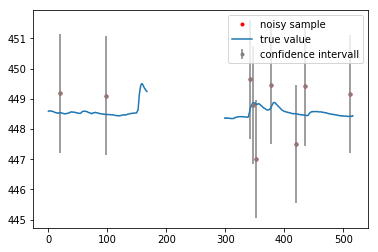

In [40]:
df_z = test_data(data= df_test, n_sample=10)

plt.plot(df_z.X, df_z.measurement, '.', label='noisy sample', color = "red")
plt.plot(df_test.X, df_test.MESSWERT_NUM, label="true value")
plt.errorbar(df_z.X, df_z.measurement, df_z.confidence95, fmt='.',
             label='confidence intervall', color="grey")

plt.legend()

plt.show()

In [41]:
df_z

,MESSWERT_NUM,X,Y,noise,confidence95,measurement
DATUM,,,,,,
2011-05-27,448.42,511.0,0.0,0.736364,1.96,449.156364
2010-01-20,448.54,19.0,0.0,0.641326,1.96,449.181326
2010-12-09,448.67,342.0,0.0,0.973443,1.96,449.643443
2011-01-14,448.74,378.0,0.0,0.730576,1.96,449.470576
2010-12-19,448.83,352.0,0.0,-1.811821,1.96,447.018179
2010-04-09,448.49,98.0,0.0,0.619747,1.96,449.109747
2011-03-12,448.46,435.0,0.0,0.954445,1.96,449.414445
2011-02-25,448.50,420.0,0.0,-0.992827,1.96,447.507173
2010-09-18,NaN,260.0,0.0,1.402915,1.96,NaN
